In [99]:
import json
from collections import Counter
from collections import defaultdict
import matplotlib.pyplot as plt

In [52]:
# load json
def load_json(file_path):
    data = []
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            for line in f:
                try:
                    data.append(json.loads(line.strip()))
                except json.JSONDecodeError as e:
                    print(f"Error decoding line: {line.strip()} - {e}")
    except FileNotFoundError:
        print("File not found.")
    return data

# count number of each keys
def analyze_keys(data):
    key_counter = Counter()
    for record in data:
        if isinstance(record, dict):
            key_counter.update(record.keys())
    return key_counter


def check_missing_values(data):
    missing_info = []
    for i, record in enumerate(data):
        if isinstance(record, dict):
            for key, value in record.items():
                if value is None or value == "":
                    missing_info.append((i, key, value))
    return missing_info


# view unique values of each key
def get_unique_values_by_key(data):
    unique_values = defaultdict(set)  
    for record in data:
        if isinstance(record, dict):  
            for key, value in record.items():
                if isinstance(value, (dict, list)):
                    value = str(value)
                unique_values[key].add(value)  
    return {key: list(values) for key, values in unique_values.items()} 

# Users

In [44]:
# load data
users_data = load_json("data/users.json")

# view data
for i, record in enumerate(users_data[:5]):
    print(record)

{'_id': {'$oid': '5ff1e194b6a9d73a3a9f1052'}, 'active': True, 'createdDate': {'$date': 1609687444800}, 'lastLogin': {'$date': 1609687537858}, 'role': 'consumer', 'signUpSource': 'Email', 'state': 'WI'}
{'_id': {'$oid': '5ff1e194b6a9d73a3a9f1052'}, 'active': True, 'createdDate': {'$date': 1609687444800}, 'lastLogin': {'$date': 1609687537858}, 'role': 'consumer', 'signUpSource': 'Email', 'state': 'WI'}
{'_id': {'$oid': '5ff1e194b6a9d73a3a9f1052'}, 'active': True, 'createdDate': {'$date': 1609687444800}, 'lastLogin': {'$date': 1609687537858}, 'role': 'consumer', 'signUpSource': 'Email', 'state': 'WI'}
{'_id': {'$oid': '5ff1e1eacfcf6c399c274ae6'}, 'active': True, 'createdDate': {'$date': 1609687530554}, 'lastLogin': {'$date': 1609687530597}, 'role': 'consumer', 'signUpSource': 'Email', 'state': 'WI'}
{'_id': {'$oid': '5ff1e194b6a9d73a3a9f1052'}, 'active': True, 'createdDate': {'$date': 1609687444800}, 'lastLogin': {'$date': 1609687537858}, 'role': 'consumer', 'signUpSource': 'Email', 'stat

In [46]:
# count number of values for each key
user_key_counts = analyze_keys(users_data)
user_key_counts

Counter({'_id': 495,
         'active': 495,
         'createdDate': 495,
         'lastLogin': 433,
         'role': 495,
         'signUpSource': 447,
         'state': 439})

In [53]:
# Get unique values for each field
unique_values = get_unique_values_by_key(users_data)
unique_values

{'_id': ["{'$oid': '5ff793dd04929111f6e90c69'}",
  "{'$oid': '5ff4ce3ac1e2d0121a9b2fb3'}",
  "{'$oid': '5ffc8f9704929111f6e922bf'}",
  "{'$oid': '6014558767804a1228b20d00'}",
  "{'$oid': '59c124bae4b0299e55b0f330'}",
  "{'$oid': '5a43c08fe4b014fd6b6a0612'}",
  "{'$oid': '60037a94fb296c4ef805ddbe'}",
  "{'$oid': '601c2c6a29c30a1227ad93bd'}",
  "{'$oid': '60086978633aab121bb8c895'}",
  "{'$oid': '5ff1e1f1cfcf6c399c274b0b'}",
  "{'$oid': '601465a584231211ce796da5'}",
  "{'$oid': '6010be65a4b74c120bd19edc'}",
  "{'$oid': '60146f2ac8b50e11d8452661'}",
  "{'$oid': '5ff74f3db3348b11c93361d1'}",
  "{'$oid': '600f008f4329897eac237bd8'}",
  "{'$oid': '600f41b2bd196811e68ea219'}",
  "{'$oid': '600f20c15edb787dce060911'}",
  "{'$oid': '602538adb54593795bf692ac'}",
  "{'$oid': '5ff873ddb3348b11c9337733'}",
  "{'$oid': '600b477e7d983a124e9ae061'}",
  "{'$oid': '601ac195af4b1a1205f7560f'}",
  "{'$oid': '6000d4abe2571211db395b5c'}",
  "{'$oid': '60088d84633aab121bb8e4a6'}",
  "{'$oid': '5964eb07e4b03e

Issues: 
- What do missing values in lastLogin represent? They had never logged in after registration?
- Many deplicate values and rows

# Brands

In [54]:
# load data
brands_data = load_json("data/brands.json")

# view data
for i, record in enumerate(brands_data[:5]):
    print(record)

{'_id': {'$oid': '601ac115be37ce2ead437551'}, 'barcode': '511111019862', 'category': 'Baking', 'categoryCode': 'BAKING', 'cpg': {'$id': {'$oid': '601ac114be37ce2ead437550'}, '$ref': 'Cogs'}, 'name': 'test brand @1612366101024', 'topBrand': False}
{'_id': {'$oid': '601c5460be37ce2ead43755f'}, 'barcode': '511111519928', 'brandCode': 'STARBUCKS', 'category': 'Beverages', 'categoryCode': 'BEVERAGES', 'cpg': {'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, '$ref': 'Cogs'}, 'name': 'Starbucks', 'topBrand': False}
{'_id': {'$oid': '601ac142be37ce2ead43755d'}, 'barcode': '511111819905', 'brandCode': 'TEST BRANDCODE @1612366146176', 'category': 'Baking', 'categoryCode': 'BAKING', 'cpg': {'$id': {'$oid': '601ac142be37ce2ead437559'}, '$ref': 'Cogs'}, 'name': 'test brand @1612366146176', 'topBrand': False}
{'_id': {'$oid': '601ac142be37ce2ead43755a'}, 'barcode': '511111519874', 'brandCode': 'TEST BRANDCODE @1612366146051', 'category': 'Baking', 'categoryCode': 'BAKING', 'cpg': {'$id': {'$oid': '601ac

In [56]:
# count number of values for each key
brand_key_counts = analyze_keys(brands_data)
brand_key_counts

Counter({'_id': 1167,
         'barcode': 1167,
         'category': 1012,
         'categoryCode': 517,
         'cpg': 1167,
         'name': 1167,
         'topBrand': 555,
         'brandCode': 933})

In [57]:
# Get unique values for each field
unique_values = get_unique_values_by_key(brands_data)
unique_values

{'_id': ["{'$oid': '5a4d23dae4b0bcb2c74ea77e'}",
  "{'$oid': '5fd2a0bfbe37ce49eb72c0f0'}",
  "{'$oid': '5d6419346d5f3b23d1bc790e'}",
  "{'$oid': '5e90a545ee7f2d70340f40d7'}",
  "{'$oid': '5fd7f2b3be37ce733975586c'}",
  "{'$oid': '57ebc017e4b0ac389136a336'}",
  "{'$oid': '5d642dd1a3a018514994f42f'}",
  "{'$oid': '5887a290e4b02187f85cdad7'}",
  "{'$oid': '5a021611e4b00efe02b02a57'}",
  "{'$oid': '5a4d1f06e4b0d5c3fd86b678'}",
  "{'$oid': '5dc03596a60b873d6b0666cd'}",
  "{'$oid': '5f7760f2be37ce1d26d7b7a7'}",
  "{'$oid': '5332f807e4b03c9a25efd16f'}",
  "{'$oid': '5db6fb28a60b87376833e367'}",
  "{'$oid': '5d66d6a2a3a018093ab34727'}",
  "{'$oid': '5fd3ae1fbe37ce0d9386bb59'}",
  "{'$oid': '5fb7fae8be37ce522e165cca'}",
  "{'$oid': '5f4802bdbe37ce0c8303373f'}",
  "{'$oid': '5a5e34fee4b0db471c2d0436'}",
  "{'$oid': '5f38578fbe37ce5178517ad7'}",
  "{'$oid': '592486bde410d61fcea3d122'}",
  "{'$oid': '5332fa77e4b03c9a25efd225'}",
  "{'$oid': '5da608821dda2c3e1416ae8c'}",
  "{'$oid': '5fcff304be37ce

In [62]:
# examine anomalies in barcode 
barcode_unique = unique_values['barcode']
for barcode in barcode_unique:
    if len(barcode) != 12 or not barcode.isdigit():
        print(barcode)

# no anomalies

In [79]:
# examine category and category code
category_dict = defaultdict(set)
brand_category_dict = defaultdict(set)
category_brand_dict = defaultdict(set)
barcode_brand_dict = defaultdict(set)
for record in brands_data:
    brand_category = record.get('category', None)
    if brand_category is None:
        print(record['name']) # brands missing category
    else:
        brand_category_dict[record['name']].add(brand_category)
        category_brand_dict[brand_category].add(record['name'])
        barcode_brand_dict[record['barcode']].add(record['name'])
        category_dict[brand_category].add(record.get('categoryCode', None))

MorningStar
Bottled Starbucks
Full Throttle
Gold Medal
Glaceau vitaminwater
Gree Giant
Sundrop
Blue Bunny
Krave
A&W Rootbeer
Powerade
Pizza Pizza Pizza
Our Family
Honey Smacks
Stella Artois
Victoria
Crispix
NessAlla
RC Cola
Amp
All-Bran
Betty Crocker
Snapple
Honest Ade
Pop-tarts
Diet Dr. Pepper
Beef Steak
Jupiler
Gardetto's
Danimals
Fanta
Diet Cherry Coke
Cheerios
.
Frosted Flakes
Cascadian Farm
Fruit Flavored Snacks
Mello Yello
Top Care
Sierra Mist
Shurfine
Apple Jacks/Cinnamon Jacks
Diet Coke
Shock Top
Diet Rite
Eggo
Modelo Especial
Town House
NOS
BETTER HOMES AND GARDENS Special Edition Magazine - Food 
Fiber One
Brew Pub
Honest Tea
All Natural
Smart Start
Quilmes
Michelob Ultra
Crunchy Nut
Allrecipes Special Edition Magazine
Good Earth
Coca-Cola
Peace Tea
Light & Fit
Bacardi
Sprite
Murray
Kickstart
Powerade Zero
Glaceau fruitwater
Johnsonville
Tombstone
Chex
Fresca
Bud Light Platinum
Fetch Rewards
Diet Coke Lime
Jacks
Froot Loops
Nutri-Grain
Leffe
Sprite Zero
Orv's
RPs
Bugles
Glace

In [76]:
# check category and categoryCode
category_dict

defaultdict(set,
            {'Baking': {'BAKING', None},
             'Beverages': {'BEVERAGES', None},
             'Candy & Sweets': {'CANDY_AND_SWEETS'},
             'Condiments & Sauces': {None},
             'Canned Goods & Soups': {None},
             'Magazines': {'MAGAZINES', None},
             'Breakfast & Cereal': {None},
             'Beer Wine Spirits': {'BEER_WINE_SPIRITS', None},
             'Health & Wellness': {'HEALTHY_AND_WELLNESS', None},
             'Beauty': {None},
             'Baby': {'BABY', None},
             'Frozen': {'FROZEN', None},
             'Grocery': {'GROCERY', None},
             'Snacks': {None},
             'Household': {None},
             'Personal Care': {None, 'PERSONAL_CARE'},
             'Dairy': {None},
             'Cleaning & Home Improvement': {'CLEANING_AND_HOME_IMPROVEMENT'},
             'Deli': {None},
             'Beauty & Personal Care': {None},
             'Bread & Bakery': {'BREAD_AND_BAKERY'},
             'Outdoor': 

In [78]:
# Check brand and their category
for brand, category_set in brand_category_dict.items():
    if len(category_set) > 1:
        print(brand, category_set) # brand with two or more categories

Caleb's Kola {'Beverages', 'Snacks'}
I CAN'T BELIEVE IT'S NOT BUTTER! {'Dairy', 'Dairy & Refrigerated'}


In [74]:
category_brand_dict

defaultdict(set,
            {'Baking': {"Baker's",
              'Calumet',
              'Dream Whip',
              'GODIVA Instant Pudding Mix',
              'Jell-O',
              'Jet-Puffed',
              'Knox Gelatin',
              'Kraft Caramels',
              'PopUp Brand A',
              'Show this Brand A',
              'alexa',
              'test',
              'test brand @1595340050104',
              'test brand @1595340085980',
              'test brand @1595340086011',
              'test brand @1595340086044',
              'test brand @1595340086078',
              'test brand @1595531348245',
              'test brand @1595531348374',
              'test brand @1595531348410',
              'test brand @1595531348450',
              'test brand @1595531362667',
              'test brand @1595968942895',
              'test brand @1595968943012',
              'test brand @1595968943049',
              'test brand @1595968943087',
              'test bran

In [83]:
# Check two or more brands with same barcodes
for barcode, name in barcode_brand_dict.items():
    if len(name) > 1:
        print(barcode, name)

511111504788 {'test', 'The Pioneer Woman'}
511111305125 {'Rachael Ray Everyday', 'Chris Image Test'}
511111504139 {'Pace', 'Chris Brand XYZ'}
511111204923 {"CHESTER'S", 'Brand1'}
511111605058 {'Health Magazine', 'Brand2'}
511111004790 {'alexa', 'Bitten Dressing'}


Issues:
- Some brands missing category
- There are some overlaps in category names, like Beauty, Personal Care, Beauty & Personal Care
- Some brand names look like "test brand...", "test", "Brand1", "Brand2" or just contain a code
- There are some sub brands under the same brand, like ONE A DAY®', 'ONE A DAY® 50+', 'ONE A DAY® KIDS', 'ONE A DAY® KIDS AND TEENS', etc. Should we consider them as the same brand?

# Receipts

In [87]:
# load data
receipts_data = load_json("data/receipts.json")

# view data
for i, record in enumerate(receipts_data[:5]):
    print(record)

{'_id': {'$oid': '5ff1e1eb0a720f0523000575'}, 'bonusPointsEarned': 500, 'bonusPointsEarnedReason': 'Receipt number 2 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)', 'createDate': {'$date': 1609687531000}, 'dateScanned': {'$date': 1609687531000}, 'finishedDate': {'$date': 1609687531000}, 'modifyDate': {'$date': 1609687536000}, 'pointsAwardedDate': {'$date': 1609687531000}, 'pointsEarned': '500.0', 'purchaseDate': {'$date': 1609632000000}, 'purchasedItemCount': 5, 'rewardsReceiptItemList': [{'barcode': '4011', 'description': 'ITEM NOT FOUND', 'finalPrice': '26.00', 'itemPrice': '26.00', 'needsFetchReview': False, 'partnerItemId': '1', 'preventTargetGapPoints': True, 'quantityPurchased': 5, 'userFlaggedBarcode': '4011', 'userFlaggedNewItem': True, 'userFlaggedPrice': '26.00', 'userFlaggedQuantity': 5}], 'rewardsReceiptStatus': 'FINISHED', 'totalSpent': '26.00', 'userId': '5ff1e1eacfcf6c399c274ae6'}
{'_id': {'$oid': '5ff1e1bb0a720f052300056b'}, 'bonusPointsEarned': 150

In [88]:
# count number of values for each key
receipts_key_counts = analyze_keys(receipts_data)
receipts_key_counts

Counter({'_id': 1119,
         'bonusPointsEarned': 544,
         'bonusPointsEarnedReason': 544,
         'createDate': 1119,
         'dateScanned': 1119,
         'finishedDate': 568,
         'modifyDate': 1119,
         'pointsAwardedDate': 537,
         'pointsEarned': 609,
         'purchaseDate': 671,
         'purchasedItemCount': 635,
         'rewardsReceiptItemList': 679,
         'rewardsReceiptStatus': 1119,
         'totalSpent': 684,
         'userId': 1119})

In [95]:
# Try to figure out the reason why some records missing bonusPointsEarned
status_set_missing_earned = set()
status_set_all = set()
for receipt in receipts_data:
    status_set_all.add(receipt['rewardsReceiptStatus'])
    if 'bonusPointsEarned' not in receipt:
        status_set_missing_earned.add(receipt['rewardsReceiptStatus'])

print("All status: ", status_set_all)
print("Status of records missing earned: ", status_set_missing_earned)

All status:  {'PENDING', 'SUBMITTED', 'FINISHED', 'FLAGGED', 'REJECTED'}
Status of records missing earned:  {'PENDING', 'SUBMITTED', 'REJECTED', 'FLAGGED', 'FINISHED'}


In [105]:
# Examine keys in rewards receipt item list
rewards_receipt_item_list = []
for record in receipts_data:
    if 'rewardsReceiptItemList' in record:
        rewards_receipt_item_list.extend(record['rewardsReceiptItemList'])

analyze_keys(rewards_receipt_item_list)

Counter({'barcode': 3090,
         'description': 6560,
         'finalPrice': 6767,
         'itemPrice': 6767,
         'needsFetchReview': 813,
         'partnerItemId': 6941,
         'preventTargetGapPoints': 358,
         'quantityPurchased': 6767,
         'userFlaggedBarcode': 337,
         'userFlaggedNewItem': 323,
         'userFlaggedPrice': 299,
         'userFlaggedQuantity': 299,
         'needsFetchReviewReason': 219,
         'pointsNotAwardedReason': 340,
         'pointsPayerId': 1267,
         'rewardsGroup': 1731,
         'rewardsProductPartnerId': 2269,
         'userFlaggedDescription': 205,
         'originalMetaBriteBarcode': 71,
         'originalMetaBriteDescription': 10,
         'brandCode': 2600,
         'competitorRewardsGroup': 275,
         'discountedItemPrice': 5769,
         'originalReceiptItemText': 5760,
         'itemNumber': 153,
         'originalMetaBriteQuantityPurchased': 15,
         'pointsEarned': 927,
         'targetPrice': 378,
     

(array([293.,  45.,   0.,  57.,   0.,   0.,  30.,   0.,   0., 119.]),
 array([  5. ,  79.5, 154. , 228.5, 303. , 377.5, 452. , 526.5, 601. ,
        675.5, 750. ]),
 <BarContainer object of 10 artists>)

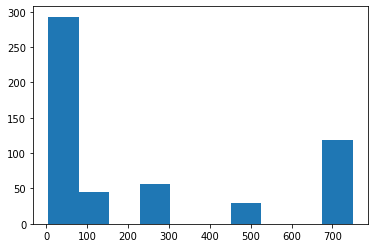

In [121]:
# Examine numerical values
bonus_points_earned_list = []
total_spent_list = []
porints_earned_list = []
target_price_list = []
for record in receipts_data:
    if 'bonusPointsEarned' in record:
        bonus_points_earned_list.append(record['bonusPointsEarned'])

    if 'totalSpent' in record:
        total_spent_list.append(float(record['totalSpent']))
    
# bonusPointsEarned
plt.figure(facecolor='white')
plt.hist(bonus_points_earned_list, bins=10)

(array([656.,  18.,   6.,   0.,   1.,   0.,   0.,   0.,   0.,   3.]),
 array([   0.   ,  472.195,  944.39 , 1416.585, 1888.78 , 2360.975,
        2833.17 , 3305.365, 3777.56 , 4249.755, 4721.95 ]),
 <BarContainer object of 10 artists>)

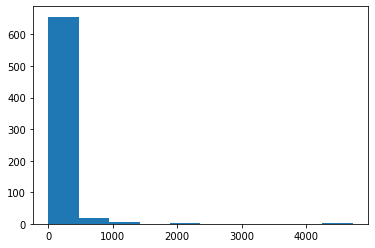

In [122]:
# totalSpent
plt.figure(facecolor='white')
plt.hist(total_spent_list, bins=10)

(array([608.,  95., 139.,  13.,   0.,   0.,   0.,   0.,   0.,  72.]),
 array([  4.5 ,  91.05, 177.6 , 264.15, 350.7 , 437.25, 523.8 , 610.35,
        696.9 , 783.45, 870.  ]),
 <BarContainer object of 10 artists>)

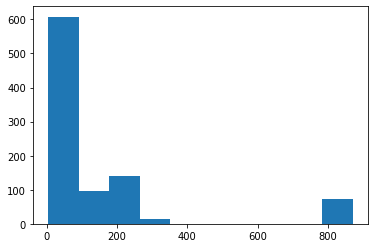

In [124]:
# Examine numerical values in item list
points_earned_list = []
target_price_list = []
for item_list in rewards_receipt_item_list:
    if 'pointsEarned' in item_list:
        points_earned_list.append(float(item_list['pointsEarned']))

    if 'targetPrice' in item_list:
        target_price_list.append(item_list['targetPrice'])
    

# pointsEarned
plt.figure(facecolor='white')
plt.hist(points_earned_list, bins=10)

(array([ 79.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 299.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

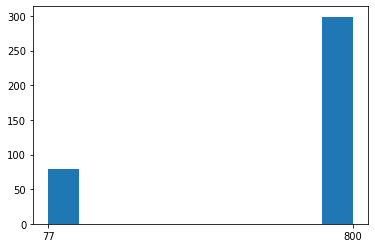

In [125]:
# targetPrice
plt.figure(facecolor='white')
plt.hist(target_price_list, bins=10)